# ANLP Assignment: Sentiment Classification

In this assignment, you will be investigating NLP methods for distinguishing positive and negative reviews written about movies.

For assessment, you are expected to complete and submit this notebook file.  When answers require code, you may import and use library functions (unless explicitly told otherwise).  All of your own code should be included in the notebook rather than imported from elsewhere.  Written answers should also be included in the notebook.  You should insert as many extra cells as you want and change the type between code and markdown as appropriate.

In order to avoid misconduct, you should not talk about the assignment questions with your peers.  If you are not sure what a question is asking you to do or have any other questions, please ask me or one of the Teaching Assistants.

Marking guidelines are provided as a separate document.

The first few cells contain code to set-up the assignment and bring in some data.   In order to provide unique datasets for analysis by different students, you must enter your candidate number in the following cell.  Otherwise do not change the code in these cells.

In [1]:
candidateno=277185 #this MUST be updated to your candidate number so that you get a unique data sample


In [2]:
#do not change the code in this cell
#preliminary imports

#set up nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('movie_reviews')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import movie_reviews

#for setting up training and testing data
import random

#useful other tools
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import zip_longest
from nltk.probability import FreqDist
from nltk.classify.api import ClassifierI


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


In [3]:
#do not change the code in this cell
def split_data(data, ratio=0.7): # when the second argument is not given, it defaults to 0.7
    """
    Given corpus generator and ratio:
     - partitions the corpus into training data and test data, where the proportion in train is ratio,

    :param data: A corpus generator.
    :param ratio: The proportion of training documents (default 0.7)
    :return: a pair (tuple) of lists where the first element of the
            pair is a list of the training data and the second is a list of the test data.
    """

    data = list(data)
    n = len(data)
    train_indices = random.sample(range(n), int(n * ratio))
    test_indices = list(set(range(n)) - set(train_indices))
    train = [data[i] for i in train_indices]
    test = [data[i] for i in test_indices]
    return (train, test)


def get_train_test_data():

    #get ids of positive and negative movie reviews
    pos_review_ids=movie_reviews.fileids('pos')
    neg_review_ids=movie_reviews.fileids('neg')

    #split positive and negative data into training and testing sets
    pos_train_ids, pos_test_ids = split_data(pos_review_ids)
    neg_train_ids, neg_test_ids = split_data(neg_review_ids)
    #add labels to the data and concatenate
    training = [(movie_reviews.words(f),'pos') for f in pos_train_ids]+[(movie_reviews.words(f),'neg') for f in neg_train_ids]
    print(training)
    testing = [(movie_reviews.words(f),'pos') for f in pos_test_ids]+[(movie_reviews.words(f),'neg') for f in neg_test_ids]

    return training, testing

When you have run the cell below, your unique training and testing samples will be stored in `training_data` and `testing_data`

In [4]:
#do not change the code in this cell
random.seed(candidateno)
training_data,testing_data=get_train_test_data()
print("The amount of training data is {}".format(len(training_data)))
print("The amount of testing data is {}".format(len(testing_data)))
print("The representation of a single data item is below")
print(training_data[0])

[(['dora', '(', 'fernanda', 'montenegro', ')', 'sits', ...], 'pos'), (['since', 'most', 'movies', 'about', 'slavery', ...], 'pos'), (['martin', 'scorsese', "'", 's', 'triumphant', ...], 'pos'), (['every', 'once', 'in', 'a', 'while', 'a', 'movie', ...], 'pos'), (['accepting', 'his', 'oscar', 'as', 'producer', 'of', ...], 'pos'), (['it', 'is', 'easy', 'to', 'see', 'why', 'the', 'late', ...], 'pos'), (['i', 'want', 'to', 'correct', 'what', 'i', 'wrote', ...], 'pos'), (['carry', 'on', 'matron', 'is', 'the', 'last', 'great', ...], 'pos'), (['notting', 'hill', "'", 's', 'trailer', 'is', 'awful', ...], 'pos'), (['insane', '(', 'but', 'inspired', ')', 'musical', ...], 'pos'), (['note', ':', 'some', 'may', 'consider', 'portions', ...], 'pos'), (['i', 'didn', "'", 't', 'realize', 'how', 'apt', 'the', ...], 'pos'), (['i', 'know', 'that', '"', 'funnest', '"', 'isn', "'", ...], 'pos'), (['it', "'", 's', 'no', 'secret', 'in', 'the', 'motion', ...], 'pos'), (['i', 'was', 'originally', 'going', 'to', 

1)  
a) **Generate** a list of 10 content words which are representative of the positive reviews in your training data.

b) **Generate** a list of 10 content words which are representative of the negative reviews in your training data.

c) **Explain** what you have done and why

[20\%]

In [5]:
stop = stopwords.words('english')
def normalise(word_list):
    lowered=[word.lower() for word in word_list]
    filtered=[word for word in lowered if word.isalpha() and word not in stop]
    return filtered

In [6]:
positive_freq_dist = FreqDist()
negative_freq_dist = FreqDist()
training_normalise=[(FreqDist(normalise(word_list)),label) for (word_list,label) in training_data]
testing_normalise=[(FreqDist(normalise(word_list)),label) for (word_list,label) in testing_data]
for reviewDist,label in training_normalise:
    if label=='pos':
        positive_freq_dist+=reviewDist
    else:
        negative_freq_dist+=reviewDist

In [7]:
def frequent_words(positive_frequency,negative_frequency,count):
    difference=positive_frequency-negative_frequency
    sorteddiff=difference.most_common()
    words=[word for (word,freq) in sorteddiff[:count]]
    return words

In [8]:
top_positive_words=frequent_words(positive_freq_dist,negative_freq_dist,10)
print(top_positive_words)

['film', 'life', 'also', 'great', 'story', 'well', 'best', 'world', 'one', 'many']


In [9]:
top_negative_words=frequent_words(negative_freq_dist,positive_freq_dist,10)
print(top_negative_words)

['bad', 'movie', 'plot', 'worst', 'even', 'nothing', 'boring', 'supposed', 'could', 'stupid']


Firstly, I used the `stopwords` function to get high-frequency English words which might not add much value to the meaning to the document and define a function name `normalise` with 1 argument `word_list` which contains a list of a word that normalise and filter the word list by removing all stopwords and punctuation from the training data to make it useful to get more meaningful information from our corpus analysis by two list comprehension -
1. Return a list of words where all characters are lowercase and stored in a `lowered` variable.
2. Return a list of words that contain only the alphabet and do not contain any stopwords in the `lowered` variable and stored in the `filtered` variable.

This function returns a `filtered` variable containing a list of words.

Then, I defined two dictionaries to get the frequency of each word using `FreqDist` which is an advanced version of Python dictionary that allows the document representations to be added and subtracted. And created two list of normalise dictionaries using normalise function containing labels for positive or negative reviews with the FreqDist function to get the frequency in `training_normalise` variable and `testing_normalise` variable. and used an iterator to add `training_normalise`  dictionary data to `positive_freq_dist` and `negative_freq_dist` based on the label value having `pos` or not.

Later, defined a `frequent_words` function containing three arguments `postive_frequency`, `negative_frequency`, and `count` to get the top high-frequency words for the dictionary. we first take the difference of `positive_frequency` to `negative_frequency` to make the dictionary unique without any duplicity and use the `most_common` method from the `FreqDist` class which returns a list of words, and frequency pairs ordered by frequency. then list comprehension to create a list of words to return without frequency in a `words` varible and return `words`

Lastly, define two variables `top_positive_words` and `top_negative_words` which will call the `frequent_words` function, and get the most frequent 10 words in the form of a list.


2)
a) **Use** the lists generated in Q1 to build a **word list classifier** which will classify reviews as being positive or negative.

b) **Explain** what you have done.

[12.5\%]


In [10]:
class SimpleClassifier(ClassifierI):

    def __init__(self, positive, negative):
        self._positive = positive
        self._negative = negative

    def classify(self, doc):
        score = 0
        for word,value in doc.items():
            if word in self._positive:
                score+=value
            if word in self._negative:
                score-=value
        if score == 0:
          return random.choice(["pos", "neg"])
        return "neg" if score < 0 else "pos"

    def classify_many(self, docs):
        return [self.classify(doc) for doc in docs]
classifier = SimpleClassifier(top_positive_words, top_negative_words)
testing,labels=zip_longest(*testing_normalise)
classifier.classify_many(testing)

['pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',


Firstly, I defined a class SimpleClassifier inherits all the methods and properties from another class `ClassifierI` which is the standard interface for single-category
classification where the set of categories is known, the number
of categories is limited, with each text belongs to exactly one
category. and outline three methods.
1. `__init__()`:

First method is a constructor which is always executed when the class is being initiated. it contains two arguments `positive` and `negative`. and define two private variables using arguments that cannot access or call the variable defined under a private class from outside.

2. `classify`:

This method is used to return positive or negative strings based on the addition/subtraction of the frequency value of words. If a word exists in the positive word list then the score will be added and for every negative word list score will be subtracted from the total score. and then it checks for the score if the score is 0 then a random choice will be made between `pos` and `neg` otherwise if the total score is more than 0 it is `pos` else `neg`.

3. `classify_many`:

This method contains one argument doc which is a dictionary of tuple defined to return a list of `pos` and `neg` value using list comprehension where each document call the classify method to get values.

I defined an instance of a class with two arguments `top_positive_words` and `top_negative_words` containing the top 10 positive and negative reviews words.
then, defined the `zip_longest` function which makes an iterator that aggregates elements from each of the iterables in `testing_normalise`. which helped to unpack and split a list of pairs into a pair of lists stored in `testing` and `labels` variables and finally call the `classify_many` function to get all positive and negative classifications with `testing` variable.

3)
a) **Calculate** the accuracy, precision, recall and F1 score of your classifier.

b) Is it reasonable to evaluate the classifier in terms of its accuracy?  **Explain** your answer and give a counter-example (a scenario where it would / would not be reasonable to evaluate the classifier in terms of its accuracy).

[20\%]

In [11]:
class ConfusionMatrix:
    def __init__(self,predict_label,training_label):
        self.TP, self.TN = 0, 0
        self.FP, self.FN = 0, 0
        self.c1, self.c2 = "pos", "neg"
        for p,t in zip(predict_label,training_label):
            if t==self.c1:
                if p==self.c1:
                    self.TP+=1
                else:
                    self.FN+=1

            elif p==self.c1:
                self.FP+=1
            else:
                self.TN+=1

    def accuracy(self):
      accuracy = 0
      accuracy = (self.TP + self.TN) / (self.TP + self.TN + self.FN + self.FP)
      return accuracy

    def precision(self):
      precision = 0
      precision = self.TP / (self.TP + self.FP)
      return precision

    def recall(self):
      recall = 0
      recall = self.TP / (self.TP + self.FN)
      return recall

    def f1(self):
        f1=0
        p=self.precision()
        r=self.recall()
        f1=(2*p*r)/(p+r)
        return f1

In [12]:
testing,labels=zip(*testing_normalise)
cm = ConfusionMatrix(classifier.classify_many(testing),labels)
print("Accuracy of the classifier is",cm.accuracy())
print("Precision of the classifier is",cm.precision())
print("Recall of the classifier is",cm.recall())
print("f1 score of the classifier is",cm.f1())

Accuracy of the classifier is 0.64
Precision of the classifier is 0.5889830508474576
Recall of the classifier is 0.9266666666666666
f1 score of the classifier is 0.7202072538860104


Evaluating the performance of a classifier using accuracy is a simple technique. We compare the actual and predicted classes of every data set. In many cases, evaluating the classifier can be reasonable with accuracy, but it is important to understand the nature and specific characteristics of every dataset and its problem with classification.

It works well when an equal number of samples are provided to each class. if an equal number of samples belonging to each class. It provides a useful overview of the model's performance with respect to overall accuracy and misclassification errors. It also helps to understand the error rate which provides benefits to look at all aspects that influence performance. When data is balanced using accuracy is the best approach to start. Most importantly it is really easy to explain it to a non-technical audience in the project to provide a better understanding of how this outcome is beneficial for business uses. especially when the model requires simplicity to understand and accuracy is preferred.

But, In an imbalanced dataset, accuracy is not a proper measure. Since it can not differentiate between the number of correct classification. Hence, it may lead to incorrect conclusions. It depends on the data provided. it is not always true and can fall misleading in some scenarios. when the respective model is deployed on unseen data and may end in wrong predictions.

**Example**- We have 990 images of the lion and 10 images of a cat in the training dataset, Our model will always predict a lion where our accuracy is 99%. because data is imbalanced. which can not be used for real-world use. some other examples are road accidents and spam emails. So, It is always good practice to consider full information of the model like recall, precision, and f1 score.

4)
a)  **Construct** a Naive Bayes classifier (e.g., from NLTK).

b)  **Compare** the performance of your word list classifier with the Naive Bayes classifier.  **Discuss** your results.

[12.5\%]

In [13]:
from nltk.classify import NaiveBayesClassifier

nltk_nb =NaiveBayesClassifier.train(training_normalise)
testing,labels=zip_longest(*testing_normalise)
nltk_nb.classify_many(testing)

['pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',


In [14]:
cm1=ConfusionMatrix(nltk_nb.classify_many(testing),labels)
print(f"Accuracy of word list classifier is {cm.accuracy()} and Naive Bayes classifier is {cm1.accuracy()}")
print(f"precision of word list classifier is {cm.precision()} and Naive Bayes classifier is {cm1.precision()}")
print(f"recall of word list classifier is {cm.recall()} and Naive Bayes classifier is {cm1.recall()}")
print(f"f1 of word list classifier is {cm.f1()} and Naive Bayes classifier is {cm1.f1()}")

Accuracy of word list classifier is 0.64 and Naive Bayes classifier is 0.7266666666666667
precision of word list classifier is 0.5889830508474576 and Naive Bayes classifier is 0.6517857142857143
recall of word list classifier is 0.9266666666666666 and Naive Bayes classifier is 0.9733333333333334
f1 of word list classifier is 0.7202072538860104 and Naive Bayes classifier is 0.7807486631016043


**Accuracy**: In word list classification accuracy is comparatively lower than the Naive Bayes classifier which describes the measured value to the actual value. which depends on precision as well but if we consider accuracy only then the Naive Bayes classifier is more reliable.

**Precision**: The naive Bayes classifier is larger than the word list classifier which defines the quality of being exact and describes the measurement of how accurate positive predictions are, rather than if they are correct or not. It describes the proportion of actual positive forecasts to all of the model's positive predictions. which the Naive Bayes classifier finds to be greater.

**Recall**: Recall measures the effectiveness of a model by identifying all relevant values in a dataset. It is the ratio of the number of true positive values to the sum of true positive and false negative values. where the Naive Bayes classifier shows much more reliability than the word list classifier.

**F1**: The F1-score is used to measure the overall performance of a classification model. It is the harmonic mean of precision and recall. where the Naive Bayes classifier is more reliable.

In all the above parameters Naive Bayes Classifier has more values than the word list classifier where the word list classifier is Simple and transparent, but may struggle with an imbalanced data set and the Naive Bayes classifier is capable of getting relationships between words and is more complex.

In this data set, I noticed that the Naive Bayes classifier enhances its ability to get more accurate relationships between words and performs better in handling large data sets. On the other hand, word list classifier struggle in such situations, showing a limitation in their ability to work on imbalanced data. In this data set both accuracy and precision show how close a measurement is to an actual value using Naive Bayes classification.

In summary, to get high accuracy and correct measurement work on more complex relationship Naive Bayes classifier stand out as more reliable.

5)
a) Design and **carry out an experiment** into the impact of the **length of the wordlists** on the wordlist classifier.  Make sure you **describe** design decisions in your experiment, include a **graph** of your results and **discuss** your conclusions.

b) Would you **recommend** a wordlist classifier or a Naive Bayes classifier for future work in this area?  **Justify** your answer.

[25\%]


In [15]:
sizes = []
scores = []
f1_score = []
for size in range(1,11):
  sizes.append(size)
  top_positive_words=frequent_words(positive_freq_dist,negative_freq_dist,size)
  top_negative_words=frequent_words(negative_freq_dist,positive_freq_dist,size)
  classifier = SimpleClassifier(top_positive_words, top_negative_words)
  cm = ConfusionMatrix(classifier.classify_many(testing),labels)
  scores.append(cm.accuracy())
  f1_score.append(cm.f1())


In [16]:
res = {
    "size": sizes,
    "accuracy": scores,
    "f1": f1_score
}

In [17]:
df=pd.DataFrame(res)
df

,size,accuracy,f1
0,1,0.521667,0.652963
1,2,0.593333,0.646377
2,3,0.608333,0.661871
3,4,0.621667,0.679831
4,5,0.618333,0.670504
5,6,0.641667,0.695035
6,7,0.650000,0.704225
7,8,0.650000,0.708333
8,9,0.631667,0.711864
9,10,0.636667,0.717617


Text(0.5, 0, 'Sample Size')

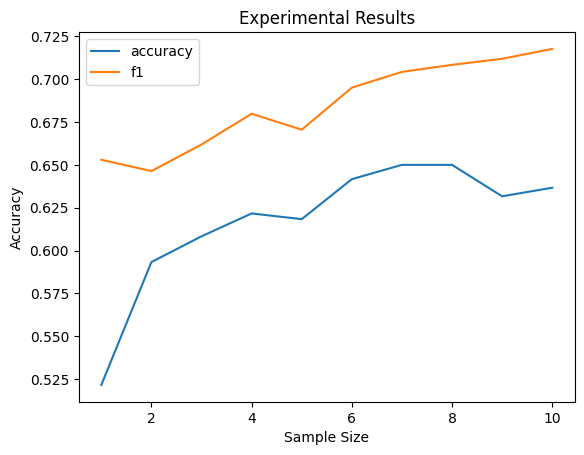

In [18]:
ax = df.plot(x = "size", y = ["accuracy","f1"],kind="line",title="Experimental Results")
ax.set_ylabel("Accuracy")
ax.set_xlabel("Sample Size")

Increasing the word list classifier improves the `F1 score` values and `accuracy` of an overall model. It increases with the sample size when the list size increases from 1 to 10 values in the most frequent word list. `F1 score` describes both precision and recall, making it useful to work with imbalanced datasets or when false positives and false negatives have different implications in the data set and `accuracy` which measures the overall correctness of the data set. `F1 score` and `accuracy` increase almost 0.1 which is a big difference in probability shown in the graph.

In my future work, I would prefer Naive Bayes classification because it provides a probabilistic framework for classification which allows to capture relationships between features. It can handle a large number of features making it suitable for text classification work. It is computationally efficient and can handle new data well. if data independence between features might not be efficient in the case. Regardless of its simplification, Naive Bayes often performs well in practice. performance value like `accuracy`, `precision`, `recall`, and `F1 score` of the Wordlist classifier is lesser than the Naive Bayes classifier which makes the Naive Bayes classifier more reliable and efficient in this use case. which shows its quality of being exact and accurate with this type of work. Wordlist classifier is only good for balanced data but Naive Bayes classifier is good with imbalanced and large data set.

In [19]:
##This code will word count all of the markdown cells in the notebook saved at filepath

import io
from nbformat import current

from google.colab import drive
drive.mount('/content/drive')

filepath="/content/drive/MyDrive/Colab Notebooks/ANLPassignment2023.ipynb"
question_count=432

with io.open(filepath, 'r', encoding='utf-8') as f:
    nb = current.read(f, 'json')

word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print("Submission length is {}".format(word_count-question_count))

<ipython-input-19-9ea4abea94eb>:4: DeprecationWarning: nbformat.current is deprecated since before nbformat 3.0

- use nbformat for read/write/validate public API
- use nbformat.vX directly to composing notebooks of a particular version

  from nbformat import current


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Submission length is 1455
